## GRIP: The Sparks Foundation
### Task 2 : Prediction using Unsupervised ML
### Data Science And Business Analytics Internship

##**Author: Nipun Navin Agarwal**

### K-means clustering 

In [1]:
## importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
## Reading data

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Exploration 

In [3]:
## Extracting columns 
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
## To find the dimension
data.shape

(150, 4)

In [5]:
## To get summary of a DataFrame. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
##Calculating some statistical data like percentile, mean, std, count, max and min of the DataFrame.
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

### Plotting the Data

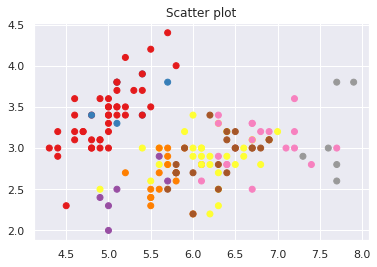

In [8]:
# plot
plt.scatter(data['sepal length (cm)'],data["sepal width (cm)"],c=data["petal length (cm)"],  
            cmap="Set1")
plt.title('Scatter plot')
plt.show()

### Select features

In [9]:
# Preparing the data
x=data.iloc[:,:].values


### Elbow method 

In [10]:
# Elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

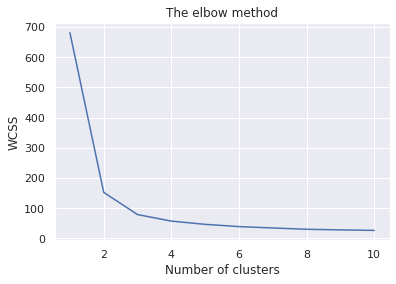

In [11]:
# Plot elbow method
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')# Within cluster sum of squares
plt.show()

In [12]:
# Applying kmeans to the data
kmeans_new= KMeans(3)
kmeans_new.fit(x)
identified_cluster=kmeans_new.fit_predict(x)
identified_cluster


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [13]:
# To get the results in a table 
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_cluster
data_with_clusters.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


 ### Visualizing the clusters

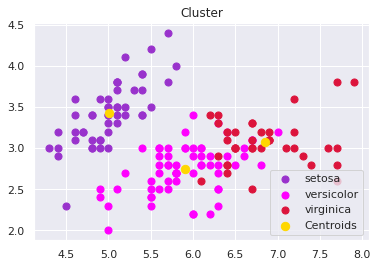

In [14]:
plt.scatter( x[identified_cluster == 0, 0],x[identified_cluster == 0, 1], s = 50, c = 'darkorchid', label = 'setosa')
plt.scatter( x[identified_cluster == 1, 0],x[identified_cluster == 1, 1], s = 50, c = 'magenta', label = 'versicolor')
plt.scatter( x[identified_cluster == 2, 0],x[identified_cluster == 2, 1], s = 50, c = 'crimson', label = 'virginica')

plt.scatter(kmeans_new.cluster_centers_[:, 0], kmeans_new.cluster_centers_[:,1], s=70,c = 'gold', label = 'Centroids')
plt.title('Cluster')
plt.legend()

plt.show()